<a href="https://colab.research.google.com/github/renzotaco/datascience/blob/main/DM_MercariJP_precio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive 

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
train=drive.CreateFile({'id':'1mN96UKMA2lcYq7vd5_MAPG9ybttjzIIM'})
train.GetContentFile('train.tsv')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('train.tsv', sep='\t')
train, test = train_test_split(data, test_size=0.2, shuffle=False)
print(train.shape, test.shape)

(1186028, 8) (296507, 8)


In [6]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values_table(data)

Your selected dataframe has 8 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
brand_name,632682,42.7
category_name,6327,0.4
item_description,4,0.0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186028 entries, 0 to 1186027
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1186028 non-null  int64  
 1   name               1186028 non-null  object 
 2   item_condition_id  1186028 non-null  int64  
 3   category_name      1180953 non-null  object 
 4   brand_name         679756 non-null   object 
 5   price              1186028 non-null  float64
 6   shipping           1186028 non-null  int64  
 7   item_description   1186026 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 81.4+ MB


In [11]:
train['price'].describe()

count    1.186028e+06
mean     2.672386e+01
std      3.844205e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

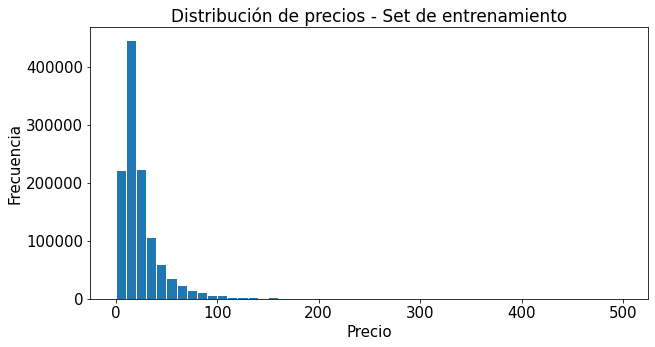

In [12]:
train['price'].plot.hist(bins=50, figsize=(10,5), edgecolor='white',range=[0,500])
plt.xlabel('Precio', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribución de precios - Set de entrenamiento', fontsize=17)
plt.show()